# **The Verlet Algorithm: A Stable Method for Orbital Simulations**

## **1. Introduction**
The **Verlet algorithm** is a numerical integration method widely used in **orbital mechanics, molecular dynamics, and physics simulations**. It is particularly effective in systems with **conservative forces**, such as planetary motion, because it **preserves energy** better than simpler methods like Euler's method.

## **2. Why Use the Verlet Algorithm?**
**Energy Conservation** – Unlike Euler’s method, Verlet does not introduce significant energy drift over time.  
**Time-Reversible** – The method treats past and future steps symmetrically, making it ideal for long-term simulations.  
**Second-Order Accuracy** – The global error scales as **$O(h^2)$**, meaning smaller step sizes reduce error significantly.  
**No Need for Explicit Velocities** – The algorithm calculates positions directly, reducing computational overhead.

---

## **3. Mathematical Formulation**
The **second-order differential equation** governing motion under a force $ \mathbf{F} $ is:
$$
m \frac{d^2 \mathbf{r}}{dt^2} = \mathbf{F}
$$
which we rewrite in terms of acceleration:
$$
\mathbf{a} = \frac{\mathbf{F}}{m}
$$

Using **Taylor series expansion**, the position at the next step $ \mathbf{r}_{n+1} $ is given by:
$$
\mathbf{r}_{n+1} = 2\mathbf{r}_n - \mathbf{r}_{n-1} + h^2 \mathbf{a}_n
$$
where:
- $ \mathbf{r}_{n+1} $ is the future position.
- $ \mathbf{r}_n $ is the current position.
- $ \mathbf{r}_{n-1} $ is the previous position.
- $ h $ is the time step.
- $ \mathbf{a}_n $ is the acceleration at time $ t_n $.

### **Velocity Computation (Only If Needed)**
Although Verlet does not directly compute velocity, it can be estimated using:
$$
\mathbf{v}_n = \frac{\mathbf{r}_{n+1} - \mathbf{r}_{n-1}}{2h}
$$
This is useful for computing **energy** or analyzing system dynamics.

---

## **4. Step-by-Step Implementation**
1. **Initialize** the position $ \mathbf{r}_0 $ and velocity $ \mathbf{v}_0 $.
2. **Estimate the "previous position"** using a simple Euler step:
   $$
   \mathbf{r}_{-1} = \mathbf{r}_0 - h \mathbf{v}_0
   $$
3. **Loop through time steps**, updating the position using the Verlet formula:
   $$
   \mathbf{r}_{n+1} = 2\mathbf{r}_n - \mathbf{r}_{n-1} + h^2 \mathbf{a}_n
   $$
4. **Compute acceleration** at each step from the force law (e.g., Newtonian gravity).
5. **Update previous positions** and repeat.

---

## **5. Why Verlet Is Better Than Euler’s Method**
| Feature          | Euler’s Method                     | Verlet Method                    |
|-----------------|--------------------------------|--------------------------------|
| **Accuracy**     | First-order ($ O(h) $)      | Second-order ($ O(h^2) $)    |
| **Energy Conservation** | Poor (drifts over time) | Excellent (remains stable)     |
| **Reversibility** | Not time-reversible | Time-reversible |
| **Stability** | Can cause unphysical spiraling | Maintains realistic orbits |

---

## **6. Applications of Verlet Integration**
**Orbital Simulations** – Used in celestial mechanics to predict planetary motion.  
**Molecular Dynamics** – Simulates atomic and molecular interactions.  
**Computer Graphics & Game Physics** – Used in physics engines for realistic motion.

---

## **7. Summary**
✔ **The Verlet algorithm is ideal for simulating conservative force systems.**  
✔ **It provides stable orbits and conserves energy better than simpler methods.**  
✔ **It is widely used in physics, astronomy, and computational simulations.**  

**For long-term simulations like planetary orbits, Verlet is the preferred method!** 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define time step (non-dimensional)
tau = 0.0005

# Initial position (non-dimensional) - this should be fixed
pos = np.array([1.0, 0.0])

# Initial velocity (non-dimensional) - vary the y-component
vel = np.array([0.0, 1.0])

# Total integration time (non-dimensional)
T = 4 * np.pi

# Number of integration steps
numSteps = int(np.ceil(T / tau))

# Preallocate arrays for speed:
time = tau * np.arange(numSteps + 1)
x = np.zeros(numSteps + 1)
y = np.zeros(numSteps + 1)
energy = np.zeros(numSteps + 1)
local_error = np.zeros(numSteps + 1)
global_error = np.zeros(numSteps + 1)
energy_error = np.zeros(numSteps + 1)

# Set initial values:
x[0], y[0] = pos
speed = np.linalg.norm(vel)
r = np.linalg.norm(pos)
accel = -pos / r**3
energy[0] = 0.5 * speed**2 - 1 / r

# Exact solution for reference:
x_exact = np.cos(time)
y_exact = np.sin(time)

# Verlet method integration
for n in range(1, numSteps + 1):
    # Take one step of the Verlet Method to update position
    if n == 1:
        # Get started with a midpoint method step
        next_pos = pos + tau * vel + 0.5 * tau**2 * accel
    else:
        # Normal Verlet update:
        next_pos = 2 * pos - prev + tau**2 * accel

    # Take one step of the Verlet Method to update velocity
    if n == 1:
        r = np.linalg.norm(next_pos)
        accel_n2 = -next_pos / r**3
        vel = vel + tau / 2 * (accel + accel_n2)
    else:
        vel = (next_pos - prev) / (2 * tau)

    # Calculate speed, radial position, and acceleration after taking the step:
    speed = np.linalg.norm(vel)
    r = np.linalg.norm(next_pos)
    accel = -next_pos / r**3

    # Update energy after taking the step:
    energy[n] = 0.5 * speed**2 - 1 / r

    # Store position update:
    x[n] = next_pos[0]
    y[n] = next_pos[1]

    # Compute local error (difference between numerical and exact solution at each step)
    local_error[n] = np.sqrt((x[n] - x_exact[n])**2 + (y[n] - y_exact[n])**2)
    
    # Compute global error (cumulative sum of local errors)
    global_error[n] = global_error[n-1] + local_error[n]
    
    # Compute energy error (relative difference from initial energy)
    energy_error[n] = np.abs((energy[n] - energy[0]) / energy[0])

    # Update 'prev' and 'pos' to calculate 'next' in the following step:
    prev = pos
    pos = next_pos

# Final Trajectory Plot
plt.figure(figsize=(6, 6))
plt.plot(x, y, 'g-', label="Numerical Trajectory")
plt.plot(0, 0, 'ro', label="Central Star")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Final Trajectory of the Orbiting Body")
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()

# Energy vs. Time Plot
plt.figure(figsize=(8, 5))
plt.plot(time, energy, 'b-', label="Total Energy")
plt.axhline(y=energy[0], color='k', linestyle='--', label="Initial Energy")
plt.xlabel('Time (non-dimensional)')
plt.ylabel('Total Energy (non-dimensional)')
plt.title("Energy Conservation in Verlet Integration")
plt.legend()
plt.grid(True)
plt.show()




## **Locan and Global Errors**

$
\text{local\_error}[n] = \sqrt{(x_n - x_{\text{exact},n})^2 + (y_n - y_{\text{exact},n})^2}
$

$
\text{global\_error}[n] = \sum_{i=1}^{n} \text{local\_error}[i]
$

$
\text{energy\_error}[n] = \left| \frac{E_n - E_0}{E_0} \right|
$

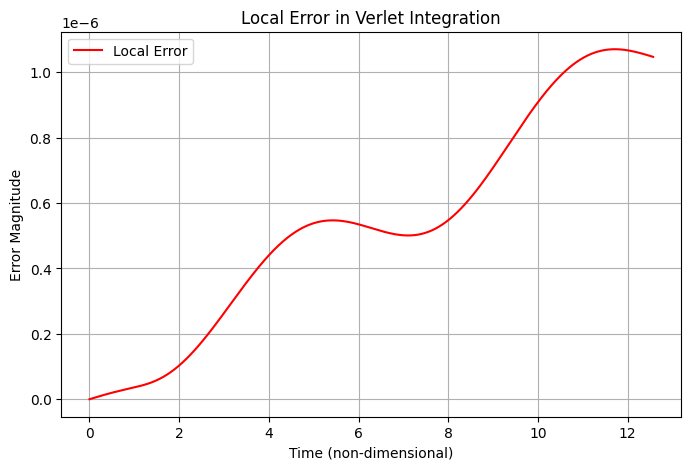

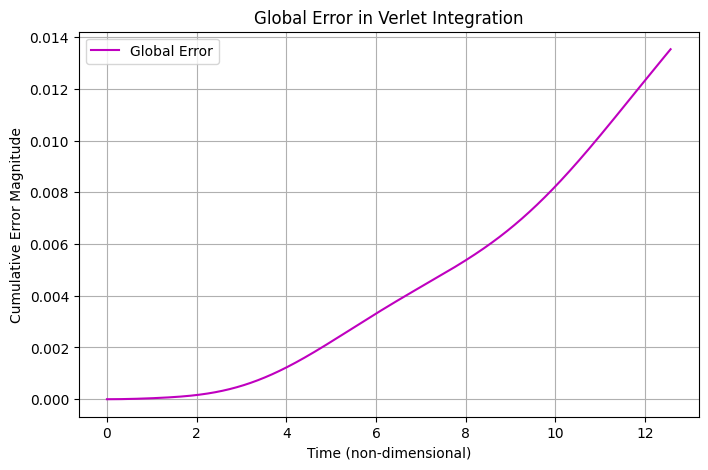

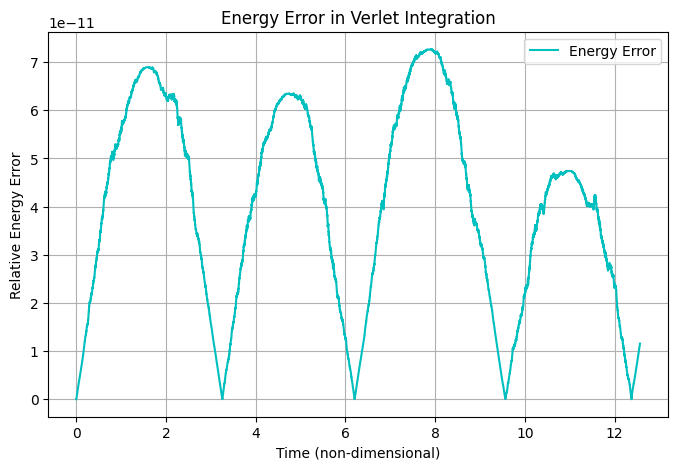

In [5]:


# Local Error Plot
plt.figure(figsize=(8, 5))
plt.plot(time, local_error, 'r-', label="Local Error")
plt.xlabel('Time (non-dimensional)')
plt.ylabel('Error Magnitude')
plt.title("Local Error in Verlet Integration")
plt.legend()
plt.grid(True)
plt.show()

# Global Error Plot
plt.figure(figsize=(8, 5))
plt.plot(time, global_error, 'm-', label="Global Error")
plt.xlabel('Time (non-dimensional)')
plt.ylabel('Cumulative Error Magnitude')
plt.title("Global Error in Verlet Integration")
plt.legend()
plt.grid(True)
plt.show()

# Energy Error Plot
plt.figure(figsize=(8, 5))
plt.plot(time, energy_error, 'c-', label="Energy Error")
plt.xlabel('Time (non-dimensional)')
plt.ylabel('Relative Energy Error')
plt.title("Energy Error in Verlet Integration")
plt.legend()
plt.grid(True)
plt.show()